In [1]:
import pandas  as pd

In [2]:
df = pd.read_csv('olist_geolocation_dataset.csv')    

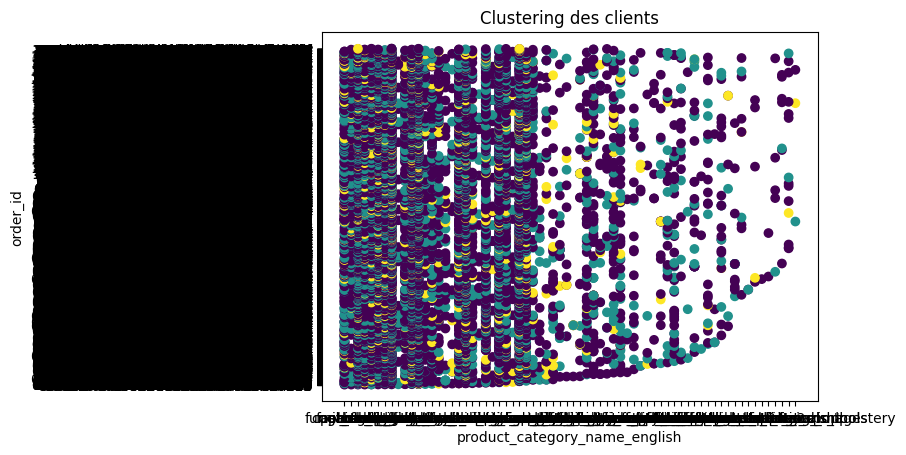

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


file1 = "data/product_category_name_translation.csv"
file2 = "data/olist_products_dataset.csv"
file3 = "data/olist_order_items_dataset.csv"
file4 = "data/cleaned_payments.csv"

dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
dataset3 = pd.read_csv(file3)
dataset4 = pd.read_csv(file4)


jointure1 = pd.merge(dataset1, dataset2, on='product_category_name', how='inner')
jointure2 = pd.merge(dataset3, jointure1, on='product_id', how='inner')
jointure3 = pd.merge(jointure2, dataset4, on='order_id', how='inner')
data_numeric = jointure2.select_dtypes(include=['float64', 'int64'])
data_numeric = data_numeric.dropna()

#reduction de la taille du datasets dans l'optique de reduire la charge de travail 
data_numeric = data_numeric.sample(frac=0.1, random_state=42)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)


labels = kmeans.labels_


jointure2 = jointure2.iloc[:len(labels)]  
jointure2['Cluster'] = labels


plt.scatter(jointure2['product_category_name_english'], jointure2['order_id'], c=jointure2['Cluster'], cmap='viridis')
plt.xlabel('product_category_name_english')
plt.ylabel('order_id')
plt.title('Clustering des clients')
plt.show()

In [14]:
jointure2.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_category_name_english',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'Cluster'],
      dtype='object')

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


file1 = "data/product_category_name_translation.csv"
file2 = "data/olist_products_dataset.csv"
file3 = "data/olist_order_items_dataset.csv"
file4 = "data/cleaned_payments.csv"

dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
dataset3 = pd.read_csv(file3)
dataset4 = pd.read_csv(file4)


jointure1 = pd.merge(dataset1, dataset2, on='product_category_name', how='inner')
jointure2 = pd.merge(dataset3, jointure1, on='product_id', how='inner')


In [33]:
KeyError: "['product_name_length', 'product_description_length'] not in index"


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming dataset3 contains the merged data
data = jointure3[['order_id', 'product_category_name_english']]

# Drop NaN values
data.dropna(inplace=True)

# Extract features and target
X = data[['order_id']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], [0] * len(X_scaled), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Scaled Order ID')
plt.title('KMeans Clustering')
plt.show()


/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/1054339966.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: could not convert string to float: '00010242fe8c5a6d1ba2dd792cb16214'

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/3405091258.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/3405091258.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/3405091258.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

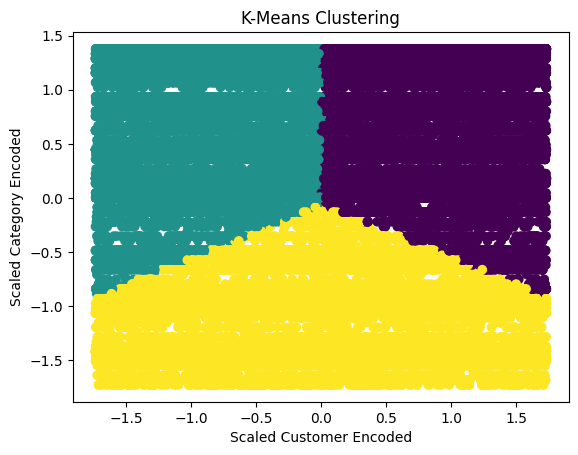

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming jointure3 contains the merged data
data = jointure3[['customer_unique_id', 'product_category_name_english']]

# Drop NaN values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['customer_encoded'] = label_encoder.fit_transform(data['customer_unique_id'])
data['category_encoded'] = label_encoder.fit_transform(data['product_category_name_english'])

# Select features
X = data[['customer_encoded', 'category_encoded']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (K)
# You can use techniques like the elbow method or silhouette score to determine the optimal number of clusters
# For demonstration purposes, let's set K=3
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Scaled Customer Encoded')
plt.ylabel('Scaled Category Encoded')
plt.title('K-Means Clustering')
plt.show()


In [24]:
purchases

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature Names: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10']


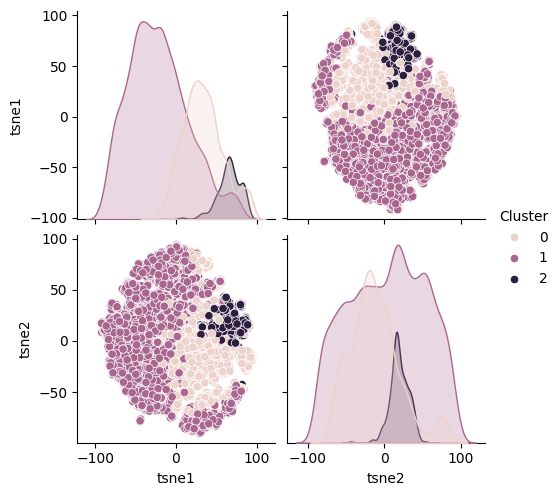

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have already loaded and preprocessed your data and stored it in 'data_scaled'

# Define generic feature names if column names are not available
num_features = data_scaled.shape[1]
feature_names = [f"Feature_{i+1}" for i in range(num_features)]
print("Feature Names:", feature_names)

# Add cluster labels to the DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne1', 'tsne2'])
tsne_df['Cluster'] = cluster_labels

# Plot the pairwise relationship between features and clusters
sns.pairplot(data=tsne_df, hue='Cluster')
plt.show()


In [9]:
feature_names = data_numeric.columns
print("Feature Names:", feature_names)

Feature Names: Index(['order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


Feature Names: ['order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


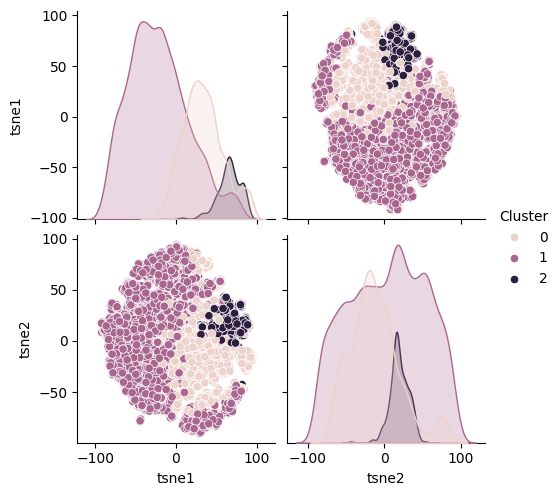

In [12]:
feature_names = data_numeric.columns.tolist()
print("Feature Names:", feature_names)

# Add cluster labels to the DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne1', 'tsne2'])
tsne_df['Cluster'] = cluster_labels

# Plot the pairwise relationship between features and clusters
sns.pairplot(data=tsne_df, hue='Cluster')
plt.show()

In [34]:
jointure2.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_category_name_english',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [41]:
import pandas as pd
from sklearn.cluster import KMeans

# Read the datasets
file1 = "data/product_category_name_translation.csv"
file2 = "data/olist_products_dataset.csv"
file3 = "data/olist_order_items_dataset.csv"

dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
dataset3 = pd.read_csv(file3)

# Merge the datasets
jointure1 = pd.merge(dataset1, dataset2, on='product_category_name', how='inner')
jointure2 = pd.merge(dataset3, jointure1, on='product_id', how='inner')

# One-hot encode the 'product_category_name_english' column
X = pd.get_dummies(jointure2['product_category_name_english'])

# Initialize KMeans with the number of clusters you desire
k = 5  # Example number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
X['cluster'] = cluster_labels

# Display the results
print(X.head())


   agro_industry_and_commerce  air_conditioning    art  arts_and_craftmanship  \
0                       False             False  False                  False   
1                       False             False  False                  False   
2                       False             False  False                  False   
3                       False             False  False                  False   
4                       False             False  False                  False   

   audio   auto   baby  bed_bath_table  books_general_interest  \
0  False  False  False           False                   False   
1  False  False  False           False                   False   
2  False  False  False           False                   False   
3  False  False  False           False                   False   
4  False  False  False           False                   False   

   books_imported  ...  signaling_and_security  small_appliances  \
0           False  ...                   False  

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Read the datasets
file1 = "data/product_category_name_translation.csv"
file2 = "data/olist_products_dataset.csv"
file3 = "data/olist_order_items_dataset.csv"
file4 = "data/cleaned_payments.csv"
dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
dataset3 = pd.read_csv(file3)
dataset4 = pd.read_csv(file4)

# Merge the datasets
jointure1 = pd.merge(dataset1, dataset2, on='product_category_name', how='inner')
jointure2 = pd.merge(dataset3, jointure1, on='product_id', how='inner')
jointure3 = pd.merge(jointure2, dataset4, on='order_id', how='inner')   

# Select relevant features
X = jointure3[['product_category_name_english', 'customer_unique_id']]

# Encode categorical features
label_encoder = LabelEncoder()
X['product_category_encoded'] = label_encoder.fit_transform(X['product_category_name_english'])
X['customer_unique_id_encoded'] = label_encoder.fit_transform(X['customer_unique_id'])

# Drop the original categorical features
X = X.drop(['product_category_name_english', 'customer_unique_id'], axis=1)

# Initialize KMeans with the number of clusters you desire
k = 5  # Example number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Decode cluster labels
decoded_labels = label_encoder.inverse_transform(cluster_labels)

# Add decoded labels to the DataFrame
X['cluster_label'] = decoded_labels

# Plot the clusters with decoded labels
plt.figure(figsize=(8, 6))
for cluster_label in X['cluster_label'].unique():
    cluster_data = X[X['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['product_category_name_english'], cluster_data['customer_unique_id'], label=f'Cluster {cluster_label}')
plt.title('KMeans Clustering')
plt.xlabel('Product Category')
plt.ylabel('Customer Unique ID')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/4195706668.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_49041/4195706668.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'product_category_name_english'

<Figure size 800x600 with 0 Axes>

In [47]:
jointure2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
111019,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
111020,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
111021,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0
